In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset

from wrf import to_np, getvar, CoordPair, vertcross

# Open the NetCDF file
filename = "file_name"
ncfile = Dataset(filename)

# Extract the model height and wind speed
z = getvar(ncfile, "z")
lwc =  getvar(ncfile, "QCLOUD")#, units="kt")[0,:]
# z = z[0:10,:,:]

# print(z)

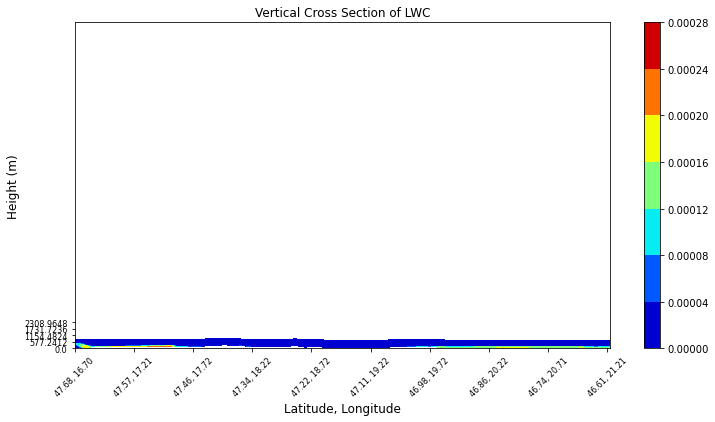

In [4]:
# 47.680296, 16.695654
# 46.619594, 21.237872
# Create the start point and end point for the cross section
start_point = CoordPair(lat=47.68, lon=16.69)
end_point = CoordPair(lat=46.61, lon=21.23)

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.
lwc_cross = vertcross(lwc[0:15,:,:], z[0:15,:,:], wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

# Create the figure
fig = plt.figure(figsize=(12,6))
ax = plt.axes()

# Make the contour plot
lwc_contours = ax.contourf(to_np(lwc_cross), cmap=get_cmap("jet"))

# Add the color bar
plt.colorbar(lwc_contours, ax=ax)

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(lwc_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
ax.set_xticks(x_ticks[::20])
ax.set_xticklabels(x_labels[::20], rotation=45, fontsize=8)

# Set the y-ticks to be height.
vert_vals = to_np(lwc_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax.set_yticks(v_ticks[::20])
ax.set_yticklabels(vert_vals[::20], fontsize=8)
ax.set_ylim([0,1000])

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude, Longitude", fontsize=12)
ax.set_ylabel("Height (m)", fontsize=12)

plt.title("Vertical Cross Section of LWC")

plt.show()